## Lab - Emotion Detection with Machine Learning

### Introduction

Welcome to the Emotion Detection Lab! In this activity, you'll explore the fascinating world of **artificial intelligence** and **machine learning** by building a model that can recognize human emotions from facial expressions.

**What you'll learn:**
- How machine learning models learn from data
- The process of training a neural network
- How to evaluate model accuracy
- How to test your model with real images

**By the end of this lab**, you'll have a working emotion detector that can identify 7 different emotions: Angry, Disgust, Fear, Happy, Neutral, Sad, and Surprise!

### Part 0 - Background Research

Before diving into the code, let's explore the concepts behind emotion detection and machine learning.

To answer the questions, edit the markdown cell and put your answer below the question.

**Make sure to save the markdown cell by pressing the ✓ (check) icon in the top right after answering the questions**

##### Question 00
What is machine learning, and how is it different from traditional programming?
- **Answer:** Machine learning is when a computer learns how to make predictions and decisions from data without being programmed for every possible situation. Traditional programming is when there are explicit rules, and instructions for a computer to follow.

##### Question 01
What is a neural network? Why do you think it's called "neural"?
- **Answer:** A neural network is a method that teaches computers to process data in a way as if it were thinking with an actual human brain. I think it's called neural because it relates to the neurons that are in our brain.

##### Question 02
Research facial emotion recognition. What are some real-world applications of this technology?
- **Answer:** Some of the real-world applications of this technology include Mood Scanner AI, MoodMe, and SAYANA EXPRESSION.

##### Question 03
What are some potential ethical concerns with emotion detection AI?
- **Answer:** Some of the potential ethical concerns with emotion dectection AI are facial expression maybe not reliably showing specific emotions, and the biased against possible groups of race. Another example is an a harm to neurodivergent individuals since their emotions are a little more complex.

### Part 1 - Setting Up Our Environment

First, we need to import the libraries (tools) we'll use to build our emotion detector. Think of these as different toolkits - some for working with numbers, some for creating visualizations, and some specifically designed for machine learning.

#### 1.0 - Installing Required Libraries

Before we can import our libraries, we need to make sure they're installed. Run these commands in your terminal:

```bash
pip3 install numpy matplotlib tensorflow keras kagglehub scipy
```

**Note:** This might take a few minutes. Tensorflow is a large library!

#### 1.1 - Importing Libraries

Now let's import all the tools we'll need:

In [2]:
import os                       # For working with files and folders

# Basic data manipulation and math
import numpy as np              # For working with arrays and numbers

# Visualization tools
import matplotlib.pyplot as plt # For creating plots and charts

# Machine Learning and Neural Networks
import tensorflow as tf         # Google's machine learning framework
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import image
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras import regularizers

print("✅ All libraries imported successfully!")

/Users/meyasstuff3/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


✅ All libraries imported successfully!


##### Question 04
Look at the imports above. Which library do you think is responsible for the actual "machine learning" part?
- **Answer:** The library that is responsible for the actual ML learning part is tensorflow. I say this because it has the most data, including the image generator.

##### Question 05
We import several tools from keras and tensorflow. Why do you think we need multiple tools instead of just one library?
- **Answer:** I think we need several tools from these libraroes because there are different parts of ML, and each has it's own process. We should use different librarys to combine the neccessary features needed for this AI.

#### 1.2 - Downloading the Dataset

Now we need to download the emotion detection dataset from Kaggle. This dataset contains thousands of facial images labeled with different emotions.

**First, install kagglehub** (if you haven't already):
```bash
pip3 install kagglehub
```

In [3]:
# Run this cell to download the dataset


import kagglehub

# Download latest version of the FER emotion detection dataset
path = kagglehub.dataset_download("ananthu017/emotion-detection-fer")

print("Path to dataset files:", path)
print("\n✅ Dataset downloaded successfully!")

/Users/meyasstuff3/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 65.2M/65.2M [00:07<00:00, 8.80MB/s]

Extracting files...


Path to dataset files: /Users/meyasstuff3/.cache/kagglehub/datasets/ananthu017/emotion-detection-fer/versions/1

✅ Dataset downloaded successfully!


💡 **Note:** The download might take a few minutes depending on your internet connection. The dataset is several hundred megabytes!

### Part 2 - Understanding Our Dataset

Machine learning models learn from data. Our dataset contains thousands of facial images labeled with different emotions. The model will study these images to learn what patterns (like eyebrow positions, mouth shapes) correspond to each emotion.

#### 2.0 - Setting Up Data Paths

Now we need to tell our program where to find the training and testing images. The dataset was just downloaded in the previous step!

In [4]:
# Set up paths to the training and testing data
# The 'path' variable was created when we downloaded the dataset
train_dir = os.path.join(path, "train")
test_dir = os.path.join(path, "test")

# Image size - all images will be resized to 48x48 pixels
img_size = 48

print(f"📁 Training data location: {train_dir}")
print(f"📁 Testing data location: {test_dir}")

📁 Training data location: /Users/meyasstuff3/.cache/kagglehub/datasets/ananthu017/emotion-detection-fer/versions/1/train
📁 Testing data location: /Users/meyasstuff3/.cache/kagglehub/datasets/ananthu017/emotion-detection-fer/versions/1/test


##### Question 06
Why do you think all images need to be the same size (48x48 pixels) for machine learning?
- **Answer:** I think all images need to be the same dimensions for ML because it wants identify patterns to be able to stack onto a batch for processing. Also the consistency, it's more easier for it to process the same vs different.

##### Question 07
We have separate folders for "train" and "test" data. Why do you think we split our data this way instead of using all images for training?
- **Answer:** We are spilting our data this way because we want the images to be unbiased, and make sure that it provides an accurate depicition. With it being in the same folder, it wouldn't be able to find patterns in new data it'll stick to the information that it was trained to do.

#### 2.1 - Data Augmentation

**Data augmentation** is a technique where we create slightly modified versions of our training images. This helps our model learn better by seeing each face from slightly different perspectives.

Think of it like this: if you only studied math problems written in one handwriting style, you might struggle with problems written differently. Data augmentation helps our model generalize better!

In [7]:

from tensorflow.keras.optimizers import Adam# Augmentation for training data - we modify these images to create variety
train_datagen = ImageDataGenerator(
    width_shift_range=0.1,      # Shift image 10% left/right
    height_shift_range=0.1,     # Shift image 10% up/down
    horizontal_flip=True,       # Randomly flip horizontally
    rescale=1./255,             # Scale pixel values to 0-1 range
    validation_split=0.2        # Use 20% for validation
)

# For validation data - we only rescale, no augmentation
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

print("✅ Data augmentation configured!")

✅ Data augmentation configured!


##### Question 08
We use `horizontal_flip=True` for data augmentation. Would it make sense to use `vertical_flip` (upside down) for facial emotion detection? Why or why not?
- **Answer:** It wouldn't make sense to use vertical_flip for facial emotion detection because it changes the appearance of facial expressions, which we naturally process images as upright by our human brain. For example. if there's a face that is happy, it could mistake that for a sad face.

##### Question 09
What does `rescale=1./255` do? Why is it helpful to scale pixel values?
- **Answer:** What the rescale does is it changes the pixel values to 0-1 which basically makes it easier for the AI to learn from. This also helps the model train more rapid and more accurately.

#### 2.2 - Loading the Data

Now we'll load the actual images from our folders and apply the augmentation we configured.

In [9]:
# Load training images
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(img_size, img_size),  # Resize all images to 48x48
    batch_size=64,                      # Process 64 images at a time
    color_mode="grayscale",             # Use black & white images (simpler than color)
    class_mode="categorical",           # We have multiple emotion categories
    subset="training"                   # This is training data
)

# Load validation images
validation_generator = validation_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(img_size, img_size),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical",
    subset="validation"
)

print("\n✅ Data loaded successfully!")
print(f"📊 Training samples: {train_generator.samples}")
print(f"📊 Validation samples: {validation_generator.samples}")
print(f"\nEmotion classes: {list(train_generator.class_indices.keys())}")

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.

✅ Data loaded successfully!
📊 Training samples: 22968
📊 Validation samples: 1432

Emotion classes: ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


##### Question 10
Look at the output above. How many total images are in the training set? How many in the validation set?
- **Answer:** The total images that are in the training set is 22,968 and the amount of images that are inside fo the validation set is 1432.
##### Question 11
We use `color_mode="grayscale"` (black and white) instead of color. What might be an advantage of using grayscale for this task?
- **Answer:** I think an advantage of using grayscale for this task might be that it makes images much simpler for the AI to understand. I think less color may mean that the amount of data is reduced. It makes it faster if color isn't important because color might take longer to process.

##### Question 12
Notice that our images are organized into folders with emotion names (like "happy", "sad", etc.), and each image is labeled with its emotion. This is called **supervised learning** because we're teaching the model using labeled examples. How is this different from **unsupervised learning**, where the model finds patterns without labels? Why do you think we need labeled data for emotion detection?
- **Answer:**  I think we need labeled data for emotion detection because the AI needs to be able to distinguish between the different types of emotion. The AI needs to be able to also know what each emotion looks like.

#### 2.3 - Analyzing the Dataset Distribution

Before we build our model, it's important to understand what data we're working with. Let's visualize how many images we have for each emotion.

**Why does this matter?** If our dataset has way more images of one emotion than another, the model might become biased!

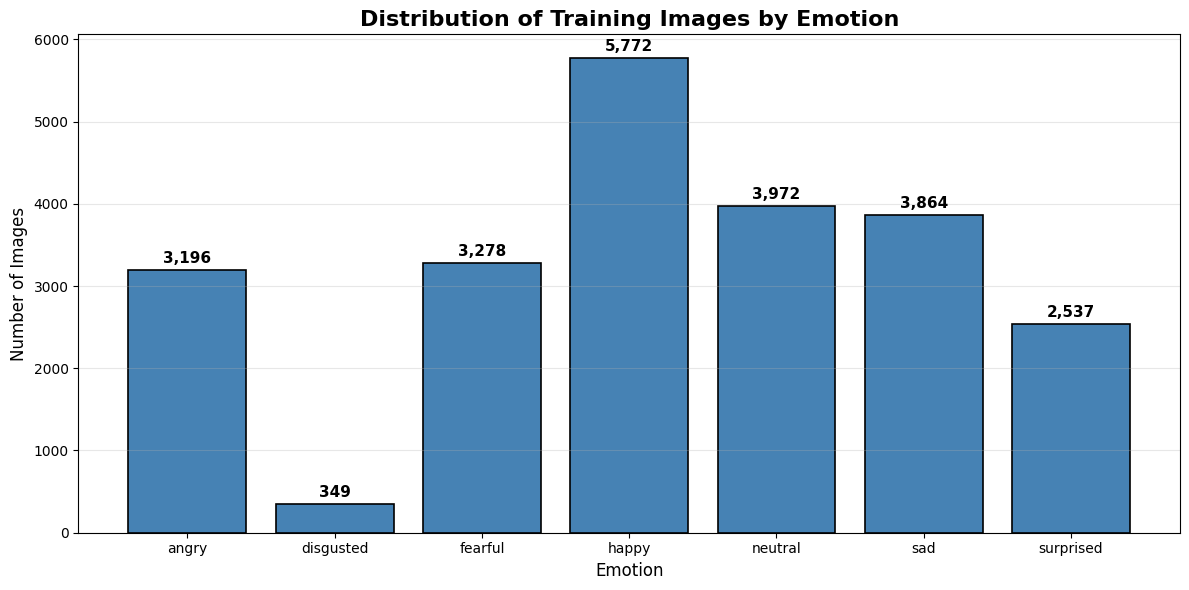

In [10]:
# Run this cell to visualize the training dataset


# Get the count of images for each emotion class
emotion_counts = {}
for emotion_name, class_index in train_generator.class_indices.items():
    count = sum(train_generator.classes == class_index)
    emotion_counts[emotion_name] = count

# Sort by emotion name for consistent display
emotions = sorted(emotion_counts.keys())
counts = [emotion_counts[emotion] for emotion in emotions]

# Create bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(emotions, counts, color='steelblue', edgecolor='black', linewidth=1.2)
plt.title('Distribution of Training Images by Emotion', fontsize=16, fontweight='bold')
plt.xlabel('Emotion', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Add count labels on top of bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
             f'{count:,}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

##### Question 13
Looking at the bar chart above, which emotion has the MOST training images? Which has the LEAST?
- **Answer:** The emotion that has the most training data is happy. The least one is digusted with 349.

##### Question 14
If one emotion has significantly more images than another, how might this affect the model's performance? Will it be equally good at recognizing all emotions?
- **Answer:**  If one emotion has more images than another, I fear the AI might learn that emotion much better.  It may not be able to learn the smaller emotions because it sees less during when it's being trained. It won't be equally goos at recognizing all emotions because if one emotion has more images it will prioritie that one and be well versed on that emotion rather than the others.

##### Question 15
Based on the distribution, which emotion(s) do you predict the model will be BEST at detecting? Which might it struggle with? Explain your reasoning.
- **Answer:** I think the AI will be best at detecting is obviously the happy emotion because it has 5,772 images. It will struggle the most with the digusted emotion because it only has 349 images. It would train on that emotion but pribably won't be proficient in it.

##### Question 16
If you were building this dataset, why might it be challenging to collect equal numbers of images for each emotion? (Think about which emotions people naturally express more often)
- **Answer:** I think it would be challenging to collect equal numbers of images for each emotion because some emotions are easier to capture because people express them often. Fears like digusted or surprised, happen less naturally and are harder to get pictures of because we don't see it alot. This can make it difficult to collect even images because not alot of humans are constantly surprised or digusted.

### Part 3 - Building the Neural Network

Now we'll build our neural network - the "brain" of our emotion detector!

**What you need to know:**
- A neural network is made up of layers that work together to recognize patterns
- Each layer looks for different features (edges, shapes, facial features)
- The network learns by adjusting itself to make better predictions

**The good news:** You don't need to understand every detail of how the network works - that's advanced computer science! The important part is understanding what the network does overall and how to train it.

Think of it like driving a car - you don't need to know how the engine works to drive successfully!

#### 3.0 - Creating the Model

The code below creates our neural network. It's pre-built for you! 

**What's happening (simplified):**
- The network has multiple layers that process the image
- Early layers detect simple patterns (like edges)
- Later layers detect complex patterns (like facial features)
- The final layer makes a decision about which emotion it sees

Just run the cell - the details aren't the focus of this activity!

In [11]:
# Run this cell to create the neural network model

# Create a Sequential model (layers stacked one after another)
model = tf.keras.models.Sequential()

# Layer 1-2: Look for basic patterns (edges, lines)
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', 
                 input_shape=(48, 48, 1)))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Layer 3: Look for shapes and curves
model.add(Conv2D(128, (5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Layer 4-5: Look for complex facial features
model.add(Conv2D(512, (3,3), padding='same', activation='relu', 
                 kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3,3), padding='same', activation='relu', 
                 kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Decision layers: Combine patterns and make predictions
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# Output layer: Gives probability for each of the 7 emotions
model.add(Dense(7, activation='softmax'))

print("✅ Neural network created!")

✅ Neural network created!


/Users/meyasstuff3/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


##### Question 17
The neural network was created for you. Why do you think we have 7 outputs in the final layer?
- **Answer:** We have 7 different outputs in the final layer because the AI is trying to predict the 7 different emotions. Each output is representing one emotion type. 

#### 3.1 - Configuring the Model

Before training, we need to configure how the model learns:

In [12]:
# Configure the learning process

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("✅ Model configured and ready to train!")

✅ Model configured and ready to train!


#### 3.2 - Model Summary (Optional)

If you're curious about the model's structure, you can view a summary:

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 4,496,903 (17.15 MB)

 Trainable params: 4,492,935 (17.14 MB)

 Non-trainable params: 3,968 (15.50 KB)

### Part 4 - Training the Model

This is where the magic happens! The model will look at thousands of facial images and gradually learn to recognize patterns associated with each emotion.

**What happens during training:**
1. Model looks at a batch of images and makes predictions
2. Compares predictions to correct answers
3. Adjusts its internal parameters to be more accurate
4. Repeats for many epochs (complete passes through the data)

**⚠️ Important:** Training will take a while (potentially 30+ minutes depending on your computer). You can reduce the number of epochs if needed.

💡 **Note:** The model has millions of parameters (numbers) that need to be learned during training. That's why we need lots of training data!

#### 4.0 - Setting Training Parameters

In [14]:
# Training configuration
epochs = 15        # Number of complete passes through the training data
batch_size = 64    # Number of images processed at once

##### Question 18
What is an "epoch"? Why do we need multiple epochs instead of just one pass through the data?
- **Answer:** An epoch is basically one full pass of training data through the AI. When the epoch will happen, the AI will look at every emotion at once. I think we use multiple epochs so that the AI can learn patterns more accurately.

#### 4.1 - Training the Model

Now let's train! Watch the accuracy increase over time. The model is learning!

In [15]:
# Start training
print("🚀 Starting training...\n")

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    verbose=1  # Show progress
)

print("\n✅ Training complete!")

🚀 Starting training...



/Users/meyasstuff3/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 644ms/step - accuracy: 0.1798 - loss: 9.5913

/Users/meyasstuff3/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 235s 651ms/step - accuracy: 0.1799 - loss: 9.5905 - val_accuracy: 0.1697 - val_loss: 9.0634
Epoch 2/15
359/359 ━━━━━━━━━━━━━━━━━━━━ 167s 466ms/step - accuracy: 0.2222 - loss: 8.4896 - val_accuracy: 0.2696 - val_loss: 7.5776
Epoch 3/15
359/359 ━━━━━━━━━━━━━━━━━━━━ 332s 927ms/step - accuracy: 0.2563 - loss: 7.4568 - val_accuracy: 0.3024 - val_loss: 6.5650
Epoch 4/15
359/359 ━━━━━━━━━━━━━━━━━━━━ 487s 1s/step - accuracy: 0.2750 - loss: 6.4871 - val_accuracy: 0.3736 - val_loss: 5.5809
Epoch 5/15
359/359 ━━━━━━━━━━━━━━━━━━━━ 506s 1s/step - accuracy: 0.3065 - loss: 5.5828 - val_accuracy: 0.3771 - val_loss: 4.7986
Epoch 6/15
359/359 ━━━━━━━━━━━━━━━━━━━━ 194s 542ms/step - accuracy: 0.3391 - loss: 4.7912 - val_accuracy: 0.3729 - val_loss: 4.3278
Epoch 7/15
359/359 ━━━━━━━━━━━━━━━━━━━━ 1852s 5s/step - accuracy: 0.3680 - loss: 4.1198 - val_accuracy: 0.4057 - val_loss: 3.6976
Epoch 8/15
359/359 ━━━━━━━━━━━━━━━━━━━━ 6835s 19s/step - accuracy: 0.3937 - loss: 3.5772 - val_

##### Question 19
Look at the training output above. Did the accuracy increase from the first epoch to the last epoch? By approximately how much?
- **Answer:** The accuracy increased from the first epoch to the last epoch by .3437.

##### Question 20
You should see two accuracy values each epoch: training accuracy and validation accuracy. Why is the validation accuracy usually lower than training accuracy?
- **Answer:** The validation accuracy is usually lower because the AI has never seen the data before probably. The training accuracy is higher because the model has already learned from those examples. The validation accuracy tests how well the AI works on unseen data.

#### 4.2 - Visualizing Training Progress

Let's create graphs to see how our model improved during training:

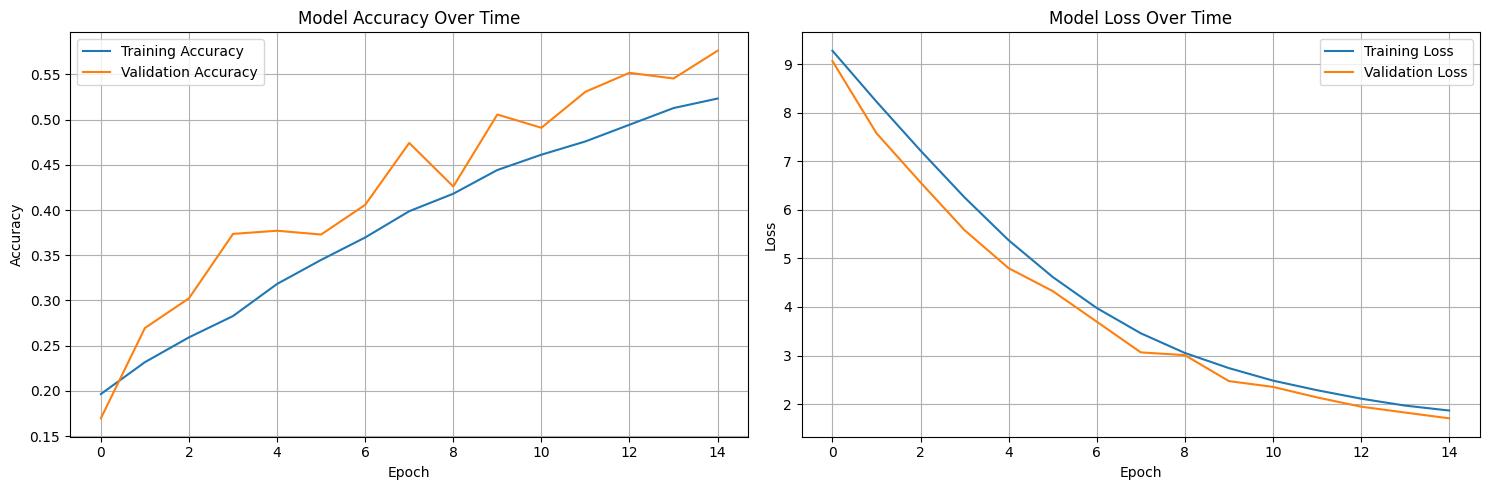

📊 Training history visualized!


In [16]:
# Create two subplots: one for accuracy, one for loss
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot accuracy
ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy Over Time')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# Plot loss
ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss Over Time')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

print("📊 Training history visualized!")

##### Question 21
Look at the accuracy graph. Does the accuracy reach a plateau (flatten out), or is it still improving at the end?
- **Answer:** The accurarcy does not fully plateau because it's still slowly improving torward the end. Both training and validation accurarcy continue to rise, even if the increase becomes smalller.

##### Question 22
The "loss" represents how wrong the model's predictions are (lower is better). Describe the shape of the loss curve. What does it tell you about the model's learning?
- **Answer:** The loss curve shows that its going downward steadily for both the training ans validation loss. The AI predictions are getting better over time. I think since both losses are decreasing smoothly without a sudden rise, it may be that the AI is learning effectively and not overfitting yet.

### Part 5 - Evaluating the Model

Now that training is complete, let's see how well our model performs on data it has never seen before!

#### 5.0 - Testing on Validation Data

In [17]:
# Evaluate on training data (data the model has seen)
train_loss, train_acc = model.evaluate(train_generator)

# Evaluate on test data (data the model has NOT seen)
test_loss, test_acc = model.evaluate(validation_generator)

print("\n" + "="*50)
print("📊 FINAL RESULTS")
print("="*50)
print(f"Training Accuracy:   {train_acc*100:.2f}%")
print(f"Validation Accuracy: {test_acc*100:.2f}%")
print("="*50)

# Calculate overfitting
overfitting = train_acc - test_acc
if overfitting > 0.1:
    print(f"\n⚠️  Warning: Model may be overfitting (difference: {overfitting*100:.2f}%)")
else:
    print(f"\n✅ Model generalization looks good! (difference: {overfitting*100:.2f}%)")

359/359 ━━━━━━━━━━━━━━━━━━━━ 39s 108ms/step - accuracy: 0.5735 - loss: 1.7022
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.5898 - loss: 1.6849

📊 FINAL RESULTS
Training Accuracy:   56.79%
Validation Accuracy: 57.61%

✅ Model generalization looks good! (difference: -0.82%)


##### Question 23
What was your final validation accuracy? How does it compare to random guessing (which would be about 14.3% for 7 emotions)?
- **Answer:** My final validation accuracy is 57.61%. It compares to random guessing for all 7 emotions becsause the AI for the most part didn't need to make an educated guess on determining which emotions was which.

##### Question 24
Is there a big difference between training accuracy and validation accuracy? What might this indicate about the model?
- **Answer:** There isn't a big different maybe by 1%. This might indicate about the model that it's not overfitting and that it is being properly trained right and it it learning correctly.

#### 5.1 - Saving the Model

Let's save our trained model so we don't have to retrain it every time!

In [18]:
# Save the model weights
model.save_weights('emotion_detector.weights.h5')
print("✅ Model weights saved to 'emotion_detector.weights.h5'")

# To load the model later, you would use:
# model.load_weights('emotion_detector.weights.h5')

✅ Model weights saved to 'emotion_detector.weights.h5'


Create a file called `.gitignore` and put the name of the model weights file (`emotion_detector.weights.h5`) to make sure it is not uploaded to GitHub. 

This file is too large to be sent to GitHub

### Part 6 - Testing With Your Own Images!

This is the fun part - let's test our emotion detector with real images! You can use:
- Photos from the test dataset
- Your own photos
- Photos you find online

**Image requirements:**
- Should clearly show a face
- Face should be well-lit
- Works best with frontal faces (not profile views)

#### 6.0 - Setting Up Emotion Labels

In [19]:
# Create a dictionary mapping numbers to emotion names
label_dict = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Neutral',
    5: 'Sad',
    6: 'Surprise'
}

print("✅ Emotion labels configured")
print("\nEmotions our model can detect:")
for key, value in label_dict.items():
    print(f"   {key}: {value}")

✅ Emotion labels configured

Emotions our model can detect:
   0: Angry
   1: Disgust
   2: Fear
   3: Happy
   4: Neutral
   5: Sad
   6: Surprise


#### 6.1 - Loading and Processing an Image

**TODO:** Update the image path below to test with your own image!

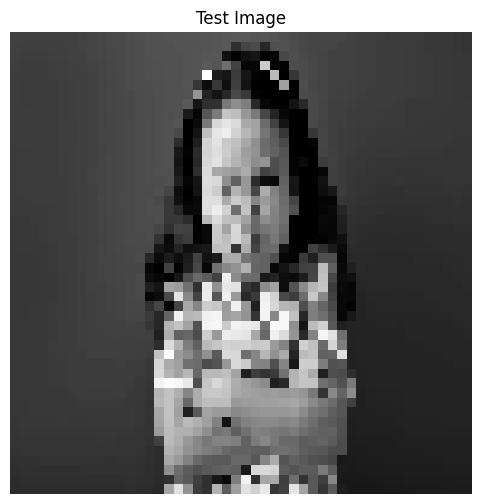

✅ Image loaded successfully


In [52]:
# TODO: Change this to your image path
image_path = "/Users/meyasstuff3/unit-3-ai-1/03-machine-learning/angry.avif"
## image_path = "/Users/meyasstuff3/unit-3-ai-1/03-machine-learning/happy.avif"
##image_path ="/Users/meyasstuff3/unit-3-ai-1/03-machine-learning/sad.jpg"
# Load and preprocess the image
img = image.load_img(image_path, color_mode="grayscale", target_size=(img_size, img_size))

# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(img, cmap='gray')
plt.title("Test Image")
plt.axis('off')
plt.show()

print("✅ Image loaded successfully")

#### 6.2 - Making a Prediction

In [53]:
# Convert image to array and preprocess
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array.reshape(1, 48, 48, 1)    # Reshape to match model input
img_array = img_array / 255.0                   # Normalize pixel values

# Make prediction
result = model.predict(img_array)
result_list = list(result[0])

print("\n" + "="*50)
print("🔮 PREDICTION RESULTS")
print("="*50)
print("\nProbability for each emotion:")
for i, prob in enumerate(result_list):
    print(f"   {label_dict[i]:<10} : {prob*100:5.2f}%")

# Find the emotion with highest probability
img_index = result_list.index(max(result_list))
predicted_emotion = label_dict[img_index]
confidence = max(result_list) * 100

print("\n" + "="*50)
print(f"🎯 PREDICTED EMOTION: {predicted_emotion}")
print(f"💪 Confidence: {confidence:.2f}%")
print("="*50)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

🔮 PREDICTION RESULTS

Probability for each emotion:
   Angry      : 11.84%
   Disgust    :  0.35%
   Fear       :  4.98%
   Happy      :  4.48%
   Neutral    : 38.26%
   Sad        : 38.29%
   Surprise   :  1.81%

🎯 PREDICTED EMOTION: Sad
💪 Confidence: 38.29%


##### Question 25
Test your model with at least 3 different images. Record the results:
- Image 1: Actual emotion: Sad | Predicted emotion: Angry | Confidence: 45.19%
- Image 2: Actual emotion: Happy | Predicted emotion: Fear | Confidence: 27.87%
- Image 3: Actual emotion: Angry | Predicted emotion: Sad | Confidence: 38.29%

##### Question 26
How accurate was your model on these test images? Were there any surprising results?
- **Answer:** My model was highely inaccurate on these test images it wasn't able to get a single photo and guess a correct emotion. I'm not sure of it was problems with the image quality or even the colors, but it was very confident in each guess. I was surprised, because I thought it would get the happy emotion since it is trained well with the most photos, but it predicted fear instead.

##### Question 27
Look at the probability percentages for all emotions. Even when the model is confident, do other emotions sometimes have non-zero probabilities? What might this tell you about how the model works?
- **Answer:** Yes, because other emotions can still have non-zero probabilities. I say this because the model shows the likelihood for each class rather than making absolute decisions. It also shows the uncertainty and similarity between emotions, so the model might spread that to classes that match the emotion (input).

##### Question 27b (Connecting back to Part 2.3)
Look back at your answer to Question 15 about the data distribution. Did the model perform better on emotions that had more training images? Compare your prediction to the actual results.
- **Answer:** The model performed worse on emotions thast had most training images because how is it that happy an emotion that had the most images, and it was able to conlcude it was fear. Fear only had about 3,000. It predicted the wrong emotion each time and was just completely unreliable.

#### 6.3 - Visualizing Predictions (OPTIONAL)

Let's create a bar chart showing the probabilities for all emotions:

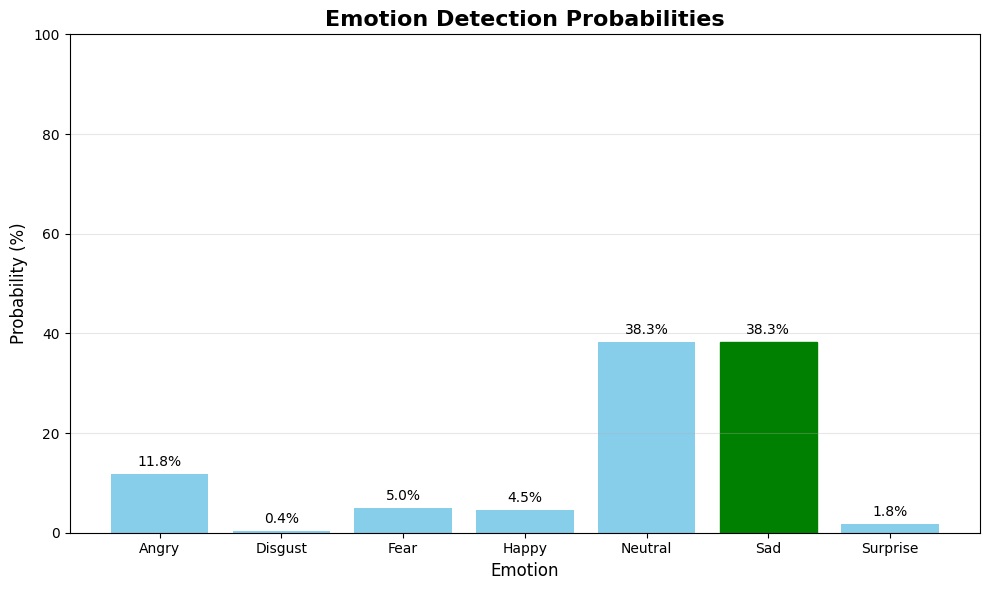

In [54]:
# Create bar chart of predictions
emotions = list(label_dict.values())
probabilities = [p * 100 for p in result_list]

plt.figure(figsize=(10, 6))
bars = plt.bar(emotions, probabilities, color='skyblue')

# Highlight the predicted emotion
bars[img_index].set_color('green')

plt.title('Emotion Detection Probabilities', fontsize=16, fontweight='bold')
plt.xlabel('Emotion', fontsize=12)
plt.ylabel('Probability (%)', fontsize=12)
plt.ylim(0, 100)
plt.grid(axis='y', alpha=0.3)

# Add percentage labels on bars
for i, (bar, prob) in enumerate(zip(bars, probabilities)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{prob:.1f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### Part 7 - Reflection and Analysis

Now that you've built, trained, and tested your emotion detector, let's reflect on what you learned.

##### Question 28
Describe the complete machine learning process you went through in this lab (from data loading to making predictions).
- **Answer:** First, I loaded and explored several datasets to understand the types of images and labels I was working with. Next, I had to download multiple packages because they contained a lot of data. I learned a lot of patience during this lab because many of these downloads took an hour and drained my battery. Then, I looked at several graphs showing how the AI was trained on a variety of images, though not all emotions were equally represented. It recognized some emotions, like happy, more often because they appeared more frequently. Making predictions and seeing the outcomes really surprised me because I expected the model to “think,” but it often failed.

##### Question 29
What factors do you think might affect the accuracy of emotion detection? (Think about image quality, lighting, facial expressions, etc.)
- **Answer:** I think factors that might affect the accuracy of emotion detection include image quality, lighting, and the angle of the face in the photo. Facial expressions that are mixed can make it harder for the model to classify emotions correctly. Additionally, variations in background,like glasses, can confuse the model. Additionally, differences in individual facial features can affect the accuracy with emotions.

##### Question 30
If you wanted to improve this model's performance, what are some things you could try? (Consider: more data, different architecture, more training time, etc.)
- **Answer:** To improve the model’s performance, some things I could try is using a larger dataset with balanced representation of all emotions. Also, changing the model neural networks might help it learn more difficult patterns. Finally, increasing training time could improve accuracy by a long jump. 

##### Question 31
This model was trained on a specific dataset. Do you think it would work equally well on people of all ages, ethnicities, and cultures? Why or why not?
- **Answer:** The model might not work equally well on people of all ages, ethnicities, and cultures. I say this because  it was trained on a specific dataset that may not include diverse examples of different facial expressions. Cultural differences can absolutely affect how emotions are seen and recognized. The model could also be biased toward groups that were overrepresented too.

##### Question 32
Think about the ethical implications: Should emotion detection AI be used in schools, workplaces, or public spaces? What are the potential benefits and concerns?
- **Answer:** I think using emotion detection AI in schools, workplaces, or public spaces has both potential benefits and concerns. It could help identify students or employees who need support or detect unsafe situations. However, it also raises issues about privacy and the risk of misinterpretation. I think we should't rely too heavily on AI for emotional exam because it could lead to unfair treatment or invade personal boundaries.

### Conclusion

Congratulations! 🎉 You've successfully:
- Built a convolutional neural network from scratch
- Trained a machine learning model on thousands of images
- Evaluated model performance
- Made predictions on real images
- Explored the ethical implications of AI

You now have hands-on experience with one of the most exciting areas of artificial intelligence!

**Key Takeaways:**
- Machine learning models learn patterns from data
- Neural networks consist of layers that detect increasingly complex patterns
- Training requires large datasets and computational power
- Model evaluation is crucial to ensure generalization
- AI technology raises important ethical questions

**Remember:** This is just the beginning of your AI journey. Keep exploring, experimenting, and learning!

---
### Resources for Further Learning

- **TensorFlow Tutorials**: https://www.tensorflow.org/tutorials
- **Keras Documentation**: https://keras.io/
- **Deep Learning Specialization**: https://www.coursera.org/specializations/deep-learning
- **Papers with Code**: https://paperswithcode.com/

---